In [308]:
import numpy as np
import scipy as sp
import scipy.stats

%matplotlib inline
import matplotlib.pyplot as plt

from exp_family import GaussianDistribution
from projectors import BoxProjector, EigenBoxProjector, CoordProjector
from optimizers import projected_gradient

In [309]:
np.random.seed(122)
obj = lambda x: x[0] * sp.stats.multivariate_normal.pdf(x, mean=[4, 4], cov=np.diag([1.2, 1.2]))
projector = CoordProjector(BoxProjector(-5, 5), EigenBoxProjector(1, 15))

In [310]:
thetas, estimations = projected_gradient(obj, GaussianDistribution, projector, 
                                         1e-6, (np.array([0, 0]), np.eye(2)), n_iters=10 ** 4)

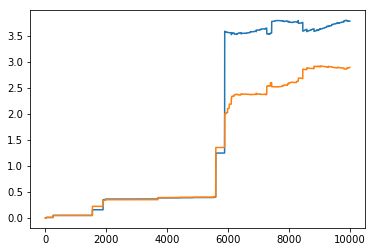

In [311]:
# plot mu history, should converge to 4,4
mu = [np.linalg.pinv(x[1]).dot(x[0]) for x in thetas]
plt.plot(mu)

In [302]:
thetas[-1]

(array([ 4.75845025,  4.6490797 ]), array([[ 1.,  0.],
        [ 0.,  1.]]))

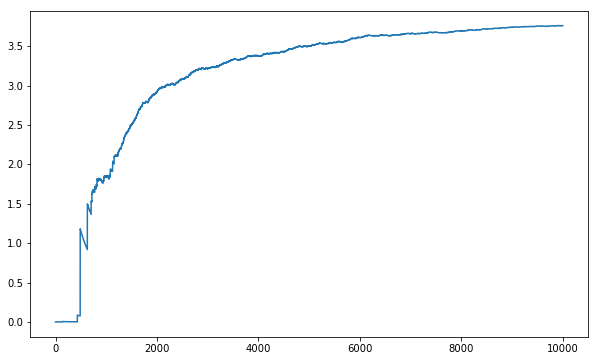

In [274]:
plt.figure(figsize=(10, 6))
plt.plot(np.array(estimations))